In [1]:
!git init

!dvc init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /Users/loonycorn/projects/dvc/dvc_image_classification_tf/.git/
Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>  

In [2]:
!git config --global user.name "loonytest"  
!git config --global user.email "loony.test.001@gmail.com"

!git remote add -f origin https://github.com/loonybq/dvc_image_classification_tf.git
    
!git branch -M main

Updating origin


### Notes:

Azure Storage Accounts and Containers are essential components of Microsoft Azure's cloud storage service, Azure Storage. They provide a scalable and secure way to store and manage data in the cloud. Here's a brief explanation of each:

An Azure Storage Account is a globally unique namespace that serves as a logical container for data objects in Azure Storage. It acts as a top-level entity for organizing and accessing various types of Azure Storage services, such as blobs, files, queues, and tables.

Storage Accounts are typically used to manage different types of data for various purposes, such as storing images, videos, documents, application data, backups, and more.

An Azure Storage Container is a sub-resource within a Storage Account that acts as a logical unit for organizing and managing sets of data objects, particularly for Blob storage.

# TODO Recording

#### Creating an Azure storage account and container

- Go to https://portal.azure.com and sign in
- Search for storage accounts in the search bar and click Storage accounts under Services. Make sure you don't click the "classic" option.
- click the Create storage account button. We can create a new resource group right here, like we do, and call it loony-dvc-rg.
- This will bring us to the Storage accounts page where you'll need We'll name this storage account "dvccifar10tf". Then you can leave all the default settings in place and click Review + create.
- Click the Go to resource button. Now you should see all of the details for your storage account.
- In the left sidebar, got to on Data storage > Containers.
- In the name field, type "dvc-cifar10-images" and then click Create. Now we have everything set up for the blob storage to work

https://iterative.ai/blog/azure-remotes-in-dvc

https://dvc.org/doc/user-guide/data-management/remote-storage/azure-blob-storage

In [ ]:
!dvc remote add -d myazureremote azure://dvc-cifar10-images
    
!dvc remote list

In [8]:
!cat .dvc/config

[core]
    remote = myazureremote
['remote "myazureremote"']
    url = azure://dvc-cifar10-images


A storage account name (account_name) is always needed. 

In [10]:
!dvc remote modify myazureremote account_name 'myazurestorage'

# TODO Recording:

#### Get connection string for storage account
- Go to the Azure Storage Account Overview page
- Click on Access Keys on the left sidebar
- Copy over the connection string for key1

A connection string for an Azure Storage Account is a string that contains all the necessary information to establish a connection and authenticate access to the storage account. It is a convenient way to provide the required credentials and settings for connecting to the Azure Storage service programmatically or through various tools and applications.

In [11]:
!dvc remote modify --local myazureremote \
    connection_string 'DefaultEndpointsProtocol=https;AccountName=dvccifar10project;AccountKey=uxzYNa03KXZgoXYrtOEK07VVye2ACm+sx+Mo90/sGUWxbnlFcvvA7ITrda1tFJEdVHAoWXra1EtM+ASt80k2Rw==;EndpointSuffix=core.windows.net'

In [12]:
!cat .dvc/config.local

['remote "myazureremote"']
    connection_string = DefaultEndpointsProtocol=https;AccountName=dvccifar10project;AccountKey=uxzYNa03KXZgoXYrtOEK07VVye2ACm+sx+Mo90/sGUWxbnlFcvvA7ITrda1tFJEdVHAoWXra1EtM+ASt80k2Rw==;EndpointSuffix=core.windows.net


In [13]:
!cat .dvc/.gitignore

/config.local
/tmp
/cache


In [14]:
!git add .dvc/config

!git status

On branch main

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .dvc/.gitignore
	new file:   .dvc/config
	new file:   .dvcignore

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	demo- 06-ImageClassificationTensorFlow.ipynb



In [15]:
!git commit -m "Initialized DVC for image classification with TensorFlow. Remote storage on Azure"

!git push -u origin main

!git log

[main (root-commit) 6b0a47a] Initialized DVC for image classification with TensorFlow. Remote storage on Azure
 3 files changed, 12 insertions(+)
 create mode 100644 .dvc/.gitignore
 create mode 100644 .dvc/config
 create mode 100644 .dvcignore
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 4 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 638 bytes | 319.00 KiB/s, done.
Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/loonybq/dvc_image_classification_tf.git
 * [new branch]      main -> main
branch 'main' set up to track 'origin/main'.
commit 6b0a47a93790a1d59ed268ad07666fa8f99336eb (HEAD -> main, origin/main)
Author: loonytest <loony.test.001@gmail.com>
Date:   Sat Jul 22 20:02:06 2023 +0530

    Initialized DVC for image classification with TensorFlow. Remote storage on Azure


In [ ]:
pip install dvc_azure

# TODO Recording

- Go to the Github repository https://github.com/loonybq/dvc_image_classification_tf/tree/main and show that the commits are here
- Open Iterative Studio on a new tab
- Add a new project connected to this repo
- Once you go to the main page of the project (where the experiments are listed) you will find a message on top of the screen "No permission to fetch remote data Set credentials, or Force import:
- We need to connect up the remote storage on Azure with Studio - click on "Set Credentials"
- Expand the sections and show
- Specify the connection string for our azure storage account

- Come back to this notebook and continue

In [16]:
!dvc config --global studio.token isat_3Ak630M1uyW8zHqg0vyhjJH9vLv0i7Ug1TxTgzxAGTEhmph8m

TensorFlow is an open-source deep learning framework developed by the Google Brain team. It was first released in 2015 and has since become one of the most widely used frameworks for building machine learning and deep learning models.

TensorFlow is known for its support of distributed computing, making it suitable for training large-scale models on clusters of GPUs or distributed computing platforms.

Keras is an open-source high-level neural networks API written in Python. It was developed by François Chollet and was initially released as a separate library. Since then, Keras has become an integral part of TensorFlow

In [ ]:
pip install tensorflow==2.11.0

Installing required  packages 

In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical, plot_model

print(tf.__version__)

2023-07-22 20:17:27.359023: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.11.0



### Notes:

Loading CIFAR-10 data using keras.datasets

HEre we explicitly choose to NOT track the data that we're using to train the model. This is not really needed because the code in the notebook downloads the data from the original site and uses it. 

In [2]:
batch_size = 64
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 447s 3us/step


Normalizing the images 

In [3]:
X_train, X_test = X_train / 255.0, X_test / 255.0

y_train, y_test = y_train.flatten(), y_test.flatten()

Creating a list of all the class labels

In [4]:
class_names = [
    'airplane', 
    'automobile', 
    'bird', 
    'cat', 
    'deer',
    'dog', 
    'frog', 
    'horse', 
    'ship', 
    'truck'
]

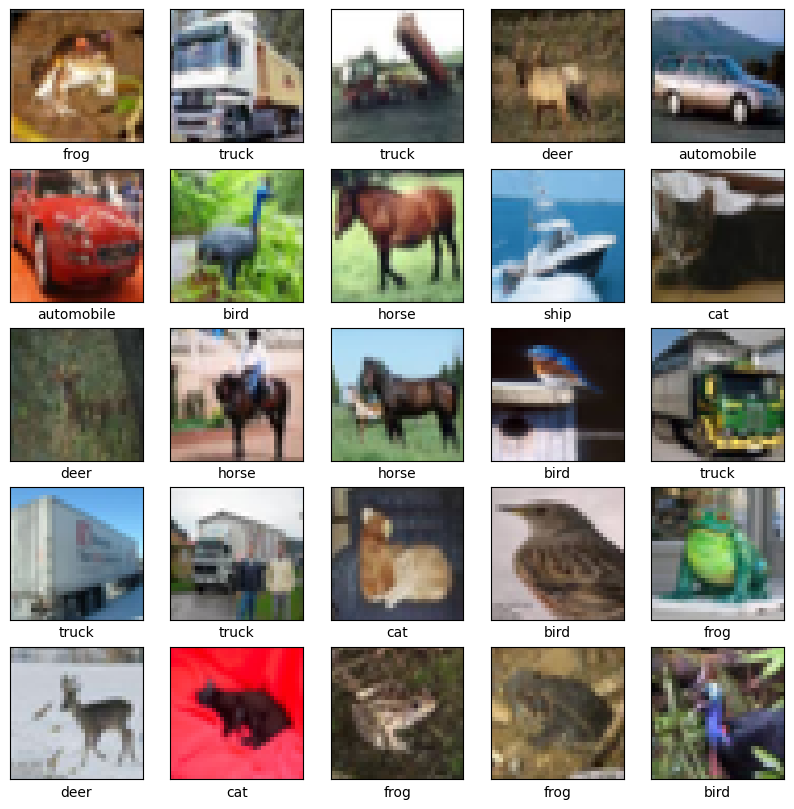

In [5]:
plt.figure(figsize = [10, 10])

for i in range (25):
    plt.subplot(5, 5, i+1)
    
    plt.xticks([])
    plt.yticks([])
    
    plt.grid(False)
    
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

plt.show()

https://keras.io/api/layers/convolution_layers/convolution2d/

In [7]:
model = Sequential()

model.add(Conv2D(
    filters=32, kernel_size=(3, 3), activation = 'relu', input_shape = (32, 32, 3)
))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(
    filters=64, kernel_size=(3, 3), activation = 'relu'
))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(
    filters=64, kernel_size=(3, 3), activation = 'relu'
))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

2023-07-22 21:11:14.579307: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Training, Validation and Test datasets are defined

In [8]:
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(50000).batch(batch_size)

# Reserve 10,000 samples for validation.

X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(batch_size)

# Prepare the test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(batch_size)

First Model is trained for 5 epochs after compilation with Live experiment tracking.Metrics and Parameters artifacts can be found inside dvclive folder , Model artifacts can be found inside tf_model_cifar10  folder.After that second model is trained.
As we compare training , eval, and test metrics of both models, test accuracy can be seen to be close. So second model with relatively lesser no. of trainable parameters seems to be doing a good job.

# DVC Report

metrics.json

|   train.loss |   train.accuracy |   eval.loss |   eval.accuracy |   step |
|--------------|------------------|-------------|-----------------|--------|
|      0.63673 |          0.77604 |    0.597629 |          0.7926 |      1 |

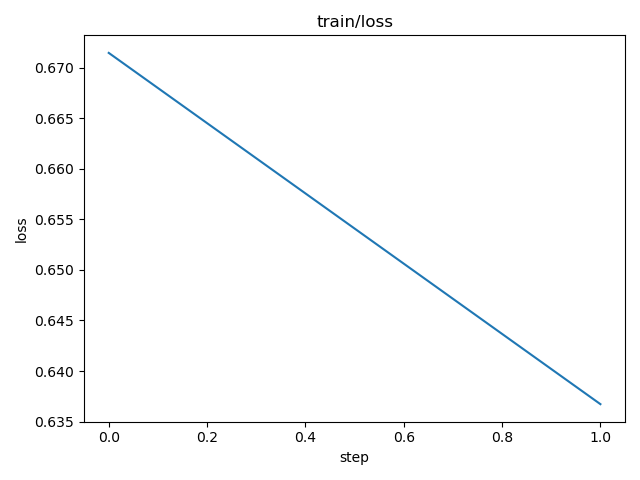

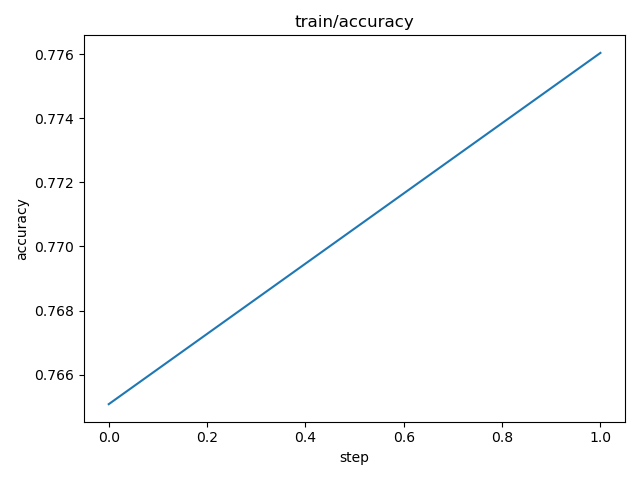

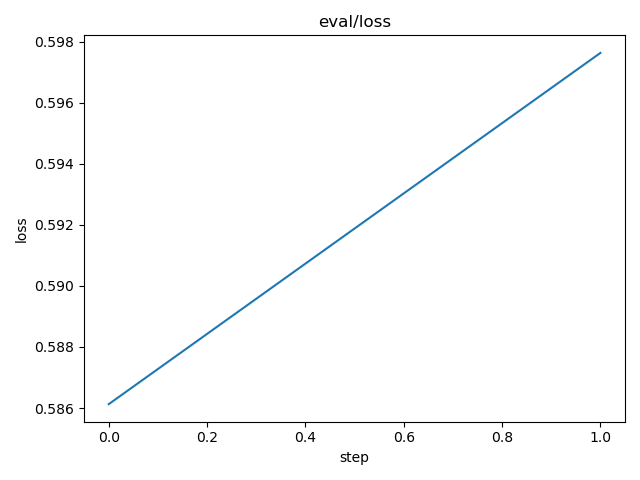

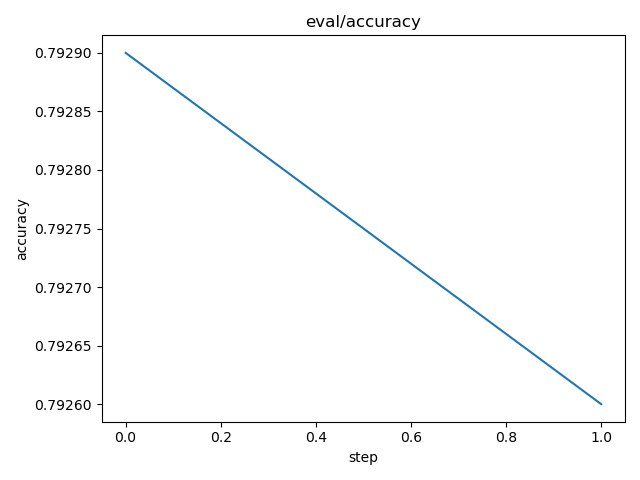


Epoch 1/2
782/782 [==============================] - 84s 105ms/step - loss: 0.6714 - accuracy: 0.7651 - val_loss: 0.5861 - val_accuracy: 0.7929
Epoch 2/2
157/157 [==============================] - 3s 19ms/step - loss: 0.9017 - accuracy: 0.7023


INFO:tensorflow:Assets written to: tf-model-cifar10/assets


INFO:tensorflow:Assets written to: tf-model-cifar10/assets


	.DS_Store, demo-06-ImageClassificationTensorFlow.ipynb, .ipynb_checkpoints/demo-06-ImageClassificationTensorFlow-checkpoint.ipynb
	.DS_Store, demo-06-ImageClassificationTensorFlow.ipynb, .ipynb_checkpoints/demo-06-ImageClassificationTensorFlow-checkpoint.ipynb


In [14]:
import dvclive

from dvclive import Live
from dvclive.keras import DVCLiveCallback

with Live(save_dvc_exp = True, report = 'notebook') as live:
    model.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
    )
    model.fit(
        train_dataset,
        epochs = 2,
        validation_data = val_dataset,
        callbacks = [DVCLiveCallback(live = live)]
    )

    # Log additional data after training
    test_loss, test_acc = model.evaluate(test_dataset)
    model.save('tf-model-cifar10')
    
    live.log_artifact('tf-model-cifar10', type = 'model')
    
    live.log_metric('test_loss', test_loss, plot = False)
    live.log_metric('test_acc', test_acc, plot = False)

# TODO Recording

- The model will take a while to train
- As it is running wait for one epoch to complete - show the output of the cell above


#### Local folder

#### Locally stored experiment details
- Go to a Finder window to the folder ~/projects/dvc/dvc_image_classification_tf
- Show the dvclive/ folder in there
- There will also be a tf-model-cifar10/ folder with the model checkpoints
- Drag the dvclive/ folder to Sublimetext and explore the files

#### Studio
- Go to Studio and show that we get the status of the current epoch 
- On the main page where the experiments are listed you can see which epoch is running and which step in the epoch. You can also see the latest logged accuracy of the model
- Select and display the plots for the experiment - you should be able to see accuracy increasing and loss falling as the training continues 
- Once the model training is complete show the plots within the notebook
- Go back to Studio and show the final plots

#### Push experiment details to Studio

- On the terminal window run this command

`dvc exp push origin melic-cyst`


#### Studio to see data and model available
- Go back to this experiment on Studio
- Note that the data as well as the model is available there
- Go to models and you will find the model listed there (cannot register the model because we have not committed to git)

### Notes:

- The TF model is saved using the tensorflow saved model format

The TensorFlow SavedModel format is a serialization format used to save and load TensorFlow models in a way that allows them to be easily deployed and used in different environments. It is the recommended way to save and share TensorFlow models for serving, inference, and deployment purposes. The SavedModel format is designed to be language-independent and platform-agnostic, enabling interoperability across different programming languages and TensorFlow versions.

A TensorFlow SavedModel consists of two main components:

Assets and Metadata:

The SavedModel contains metadata and assets that provide additional information about the model and its dependencies. This can include things like the signature of the model (input and output tensor names and types), training configuration, hyperparameters, and any custom assets required for serving or inference.


Model Artifacts:

The model artifacts are the actual TensorFlow computation graphs and variables that define the model architecture and parameters. These artifacts are stored in a platform-neutral way to ensure compatibility across different systems.

#### Let's commit the changes associated with the latest experiment to git

Make sure our local branch is up to date with main

In [15]:
!git pull

Already up to date.


In [16]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.DS_Store
	.gitignore
	.ipynb_checkpoints/
	demo-06-ImageClassificationTensorFlow.ipynb
	dvclive/
	tf-model-cifar10.dvc

nothing added to commit but untracked files present (use "git add" to track)


# TODO Recording:

- Rmove the .DS_Store file behind the scenes if it is present

In [18]:
!ls -la dvclive/

total 16
drwxr-xr-x   5 loonycorn  staff  160 Jul 23 10:00 .
drwxr-xr-x  12 loonycorn  staff  384 Jul 23 10:00 ..
-rw-r--r--   1 loonycorn  staff  137 Jul 22 22:34 dvc.yaml
-rw-r--r--   1 loonycorn  staff  284 Jul 22 22:34 metrics.json
drwxr-xr-x   4 loonycorn  staff  128 Jul 22 22:33 plots


In [19]:
!git add dvclive/.

In [22]:
!ls -la 

total 640
drwxr-xr-x  11 loonycorn  staff     352 Jul 23 10:02 .
drwxr-xr-x  11 loonycorn  staff     352 Jul 23 09:04 ..
drwxr-xr-x   7 loonycorn  staff     224 Jul 22 21:26 .dvc
-rw-r--r--   1 loonycorn  staff     139 Jul 22 18:55 .dvcignore
drwxr-xr-x  14 loonycorn  staff     448 Jul 23 10:01 .git
-rw-r--r--   1 loonycorn  staff      36 Jul 22 22:34 .gitignore
drwxr-xr-x   3 loonycorn  staff      96 Jul 22 20:28 .ipynb_checkpoints
-rw-rw-r--@  1 loonycorn  staff  314439 Jul 23 10:02 demo-06-ImageClassificationTensorFlow.ipynb
drwxr-xr-x   5 loonycorn  staff     160 Jul 23 10:00 dvclive
drwxr-xr-x   7 loonycorn  staff     224 Jul 22 22:34 tf-model-cifar10
-rw-r--r--   1 loonycorn  staff     115 Jul 22 22:34 tf-model-cifar10.dvc


In [23]:
!cat .gitignore

/tf_model_cifar10
/tf-model-cifar10


In [29]:
!git add tf-model-cifar10.dvc

In [ ]:
!git add ImageClassificationTensorFlow.ipynb

### Notes:

Once again please note that we're choosing to NOT track the data that we use to train the model since we download it from the original site in this notebook

In [37]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   dvclive/dvc.yaml
	new file:   dvclive/metrics.json
	new file:   dvclive/plots/metrics/eval/accuracy.tsv
	new file:   dvclive/plots/metrics/eval/loss.tsv
	new file:   dvclive/plots/metrics/train/accuracy.tsv
	new file:   dvclive/plots/metrics/train/loss.tsv
	new file:   tf-model-cifar10.dvc

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.gitignore
	.ipynb_checkpoints/
	demo-06-ImageClassificationTensorFlow.ipynb



In [38]:
!git commit -m "Committing model, data, and experiment files for TensorFlow CNN model"

[main c2087b4] Committing model, data, and experiment files for TensorFlow CNN model
 7 files changed, 40 insertions(+)
 create mode 100644 dvclive/dvc.yaml
 create mode 100644 dvclive/metrics.json
 create mode 100644 dvclive/plots/metrics/eval/accuracy.tsv
 create mode 100644 dvclive/plots/metrics/eval/loss.tsv
 create mode 100644 dvclive/plots/metrics/train/accuracy.tsv
 create mode 100644 dvclive/plots/metrics/train/loss.tsv
 create mode 100644 tf-model-cifar10.dvc


In [39]:
!git push -u origin main

Enumerating objects: 15, done.
Counting objects: 100% (15/15), done.
Delta compression using up to 4 threads
Compressing objects: 100% (13/13), done.
Writing objects: 100% (14/14), 1.34 KiB | 685.00 KiB/s, done.
Total 14 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/loonybq/dvc_image_classification_tf.git
   6b0a47a..c2087b4  main -> main
branch 'main' set up to track 'origin/main'.


### Notes:

- Anyone else on your team who wishes to pull from git and use this model will need to have the Azure credentials set up on their config.local file in order to be able to access Azure